## COSC2671 Social Media and Network Analytics
### Workshop 5: Topic Models

#### Jeffrey Chan, RMIT University, 2022

In [19]:
import pandas
from wordcloud import WordCloud
%load_ext autoreload
%autoreload 1
from workshop05Code import twitterClient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
import math

from tweepy import Cursor
from tweepy import api
# from twitterClient import twitterClient

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

 Function to perform pre-ing.

In [3]:
def process(text, tokeniser=TweetTokenizer(), stopwords=[]):
    """
    Perform the processing.  We used a a more simple version than week 4, but feel free to experiment.

    @param text: the text (tweet) to process
    @param tokeniser: tokeniser to use.
    @param stopwords: list of stopwords to use.

    @returns: list of (valid) tokens in text
    """

    text = text.lower()
    tokens = tokeniser.tokenize(text)

    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [4]:
#
# TWitter parameters
#

# Instead of own timeline, will retrieve the specified user's timeline 
user = 'RMIT'
# uncomment this to use own account (note you do need to have at least resultsToRetrieve number of tweets)
# user = None
# The number of tweets to retrieve and print (default = 500)
resultsToRetrieve = 100

### Retrieving tweets

In [5]:
# use built-in nltk tweet tokenizer
# there is definitely scope to improve this
tweetTokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct + ['rt', 'via', '...']

# construct twitter client
client = twitterClient.twitterClient()

# this will store the list of tweets we read from timeline
lTweets = []

# the fields we want to retrieve\n"
lFields = ['author_id','entities','id','in_reply_to_user_id','referenced_tweets','text']

# retrieve the first 10 tweets in your timeline (look up the api doc about Client.get_user_tweets, and also the field max_results)
dTimeline = client.get_users_tweets(id=client.get_user(username=user).data.id, max_results=resultsToRetrieve, user_auth=False, tweet_fields=lFields)
for tweet in dTimeline.data:
    lTokens = process(text=tweet.text, tokeniser=tweetTokenizer, stopwords=stopwordList)
    lTweets.append(' '.join(lTokens))


### LDA model

In [6]:
#
# LDA parameters
#

# number of topics to discover (default = 10)
topicNum = 10
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 20
# this is the number of features/words to used to describe our documents
# please feel free to change to see effect
featureNum = 1500

In [7]:
"""
Performs counting via CountVectorizer and then apply the LDA model.
"""

#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lTweets)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names_out()


#
# LDA MODEL
#

# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

### Visualising topics

In [8]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [9]:
#
# Diplays discovered topics
#

display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
workers surveyed supply survey students supported popular economists boosting https gas ideas million said prices vice theatre policies increased design
Topic 1:
https rmit students year space marc architectural old awards heart images things alumni webb james telescope maschmann gravity provide question
Topic 2:
https indigenous digital deepfakes congratulations imagery finalists views evolved years australian need like telescope look used nominated darryn commission changes
Topic 3:
dr government rmit support nasa infrastructure https csa credits university offer david radiation homelessness test image stsci kelly protection esa
Topic 4:
https rmit new report technology melbourne rmit_healthlab key csa credits webb nasa program available stsci australia expert opportunities care students
Topic 5:
https hour world new rmit community like meet space inspired bringing demand high social test connection troy_innocent academic street arcade
Topic 6:
https rmit architecture skills

In [15]:
#
# pyLDAvis
#

panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

# TODO: Add the pyLDAvis code here
# note if you also implemented the word cloud, that will display first, then once you close that
# file, then this will display

C:\Users\lukas\anaconda3\envs\smna\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lukas\anaconda3\envs\smna\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
C:\Users\lukas\anaconda3\envs\smna\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lukas\anaconda3\envs\smna\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    # plotRowNum = 3 ???
    # plotColNum = 3 ???

    # TODO: complete the implementation
    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        # plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show(block=True)

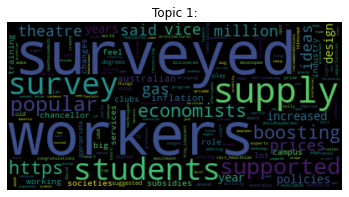

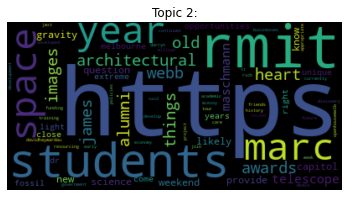

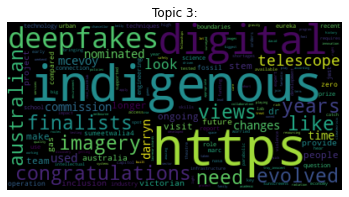

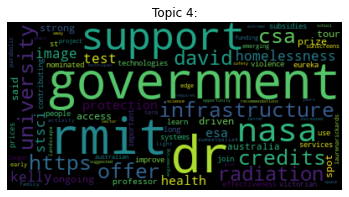

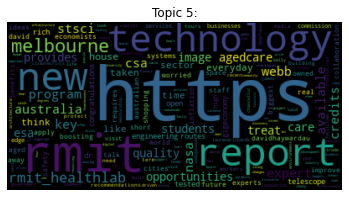

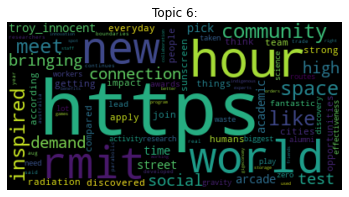

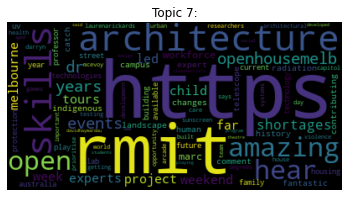

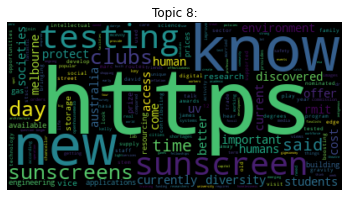

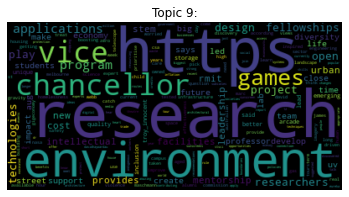

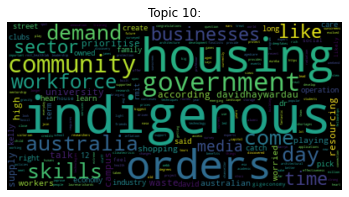

In [44]:
#
# Word Cloud
#

# display wordcloud
# TODO: go to the function definition and complete its implementation
displayWordcloud(ldaModel, tfFeatureNames)